# **Mobilidade Urbana Fortaleza**

Desenvolvi esse projeto como parte de um trabalho da disciplina de computação numérica que envolviam métodos matemáticos envolvendo funções (ajustes de curvas, raízes, interpolação, etc.), ao mesmo tempo que abordava o tema “mobilidade urbana”. Escolhi realizar um comparativo do preço da passagem do busão com 1L de gasolina de uma capital aleatória, Fortaleza (isso não teve nada a ver com o fato de eu ser cearense, foi completamente aleatório tá?). Coletei dados de 2002 a 2020 e plotei a distribuição dos pontos graficamente.

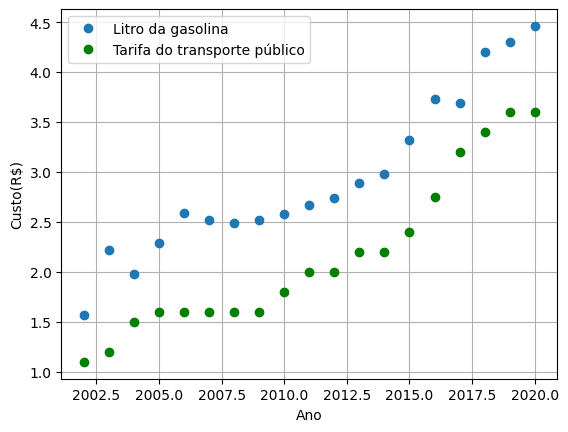

In [ ]:
# DESCRIÇÃO, DADOS E FONTES
import numpy as np
import matplotlib.pyplot as plt
'''
Legenda:
x = período em ano (2002 - 2020).
y_0 = preço do litro da gasolina (média geral) no mês de março de cada ano.
y_1 = tarifa do transporte público no mês de março de cada ano em Fortaleza - CE.

Objetivos:
- Usar MMQ para encontrar o polinômio de segundo grau que represente o comportamento das tarifas do transporte público em Fortaleza-CE
e a média geral do preço do litro da gasolina.
- Usar raizes para prever a partir do polinômio obtido, o período em que a tarifa do transporte público se tornará equivalente à 1 litro de gasolina.
- Escolher uma quantidade mínima de pontos do preço da gasolina e interpolá-los para melhor representar tal preço (de modo que sejam
escolhidos os pontos mais significativos -> que minimizem o erro da interpolação em relação aos dados reais, ou seja, os pontos mais
proximos do y que eu quero estimar).
'''
x = np.arange(2002,2021)
y_0 = [1.5739,2.2152,1.9813,2.291,2.587,2.518,2.493,2.524,2.578,2.67,2.74,2.886,2.98,3.323,3.73,3.687,4.199,4.305,4.462]
y_1 = [1.1,1.2,1.5,1.6,1.6,1.6,1.6,1.6,1.8,2,2,2.2,2.2,2.4,2.75,3.2,3.4,3.6,3.6]
plt.plot(x,y_0,'o',label = 'Litro da gasolina')
plt.plot(x,y_1,'og', label= "Tarifa do transporte público")
plt.xlabel('Ano')
plt.ylabel('Custo(R$)')
plt.legend()
plt.grid()

0.6379592058834488
0.35859059716066566


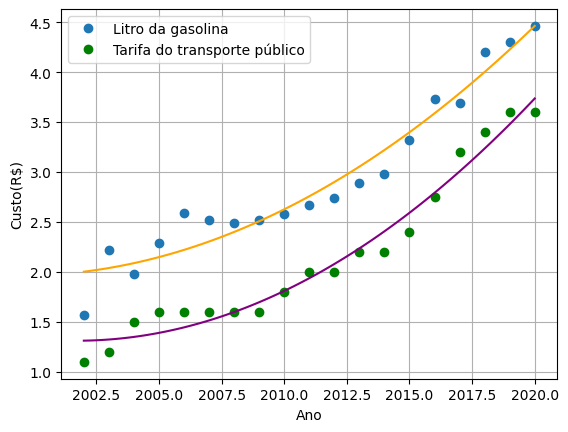

In [ ]:
#MMQ
# dados e plotagem dos pontos
from matplotlib.cm import ma
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(2002,2021)
y_0 = [1.5739,2.2152,1.9813,2.291,2.587,2.518,2.493,2.524,2.578,2.67,2.74,2.886,2.98,3.323,3.73,3.687,4.199,4.305,4.462]
plt.plot(x,y_0,'o',label = 'Litro da gasolina')
y_1 = [1.1,1.2,1.5,1.6,1.6,1.6,1.6,1.6,1.8,2,2,2.2,2.2,2.4,2.75,3.2,3.4,3.6,3.6]
plt.plot(x,y_1,'og',label= "Tarifa do transporte público")

# funções que calculam os coeficientes da função polinomial
def matriz(x):
  mat = np.ones([len(x),3])
  for i in range(len(x)):
    mat[i][1] = x[i]
    mat[i][2] = x[i]**2
  return mat
c = matriz(x)
def ajuste(c,y):
  A = np.linalg.inv(c.T@c)@c.T@y
  return A
# função que mede o erro quadrático
def erro (Y,A):
  ye = A[0] + A[1]*x + A[2]*x**2
  sum = 0
  for i in range(len(Y)):
    sum+= (Y[i]-ye[i])**2
  return sum
# plot da função polinomial (gasolina) - laranja
Ag = ajuste(c,y_0)
xg = np.linspace(min(x),max(x),100)
yg = Ag[0] + Ag[1]*xg + Ag[2]*xg**2
plt.plot(xg,yg,"orange")
print(erro(y_0,Ag))

# plot da função polinomial (tarífa do transporte público) - roxo
At = ajuste(c,y_1)
xt = np.linspace(min(x),max(x),100)
yt = At[0] + At[1]*xt + At[2]*xt**2
plt.plot(xt,yt,"purple")
print(erro(y_1,At))

plt.xlabel('Ano')
plt.ylabel('Custo(R$)')
plt.legend()
plt.grid()

Raiz(Ano):  2036 
Erro:  1.5620571502950042e-10 
Iterações:  8


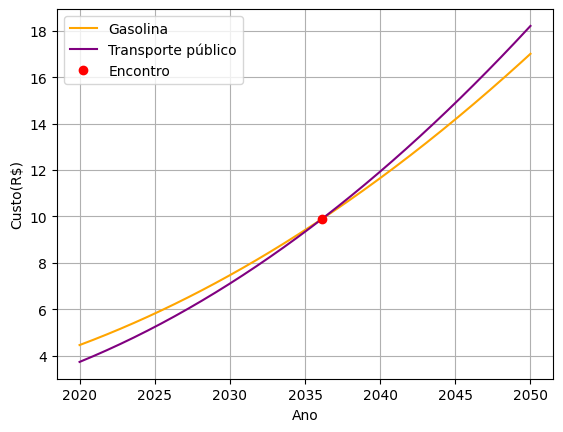

In [ ]:
# RAIZ (Falsa Posição)
from matplotlib.cm import ma
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(2002,2021)
y_0 = [1.5739,2.2152,1.9813,2.291,2.587,2.518,2.493,2.524,2.578,2.67,2.74,2.886,2.98,3.323,3.73,3.687,4.199,4.305,4.462]
y_1 = [1.1,1.2,1.5,1.6,1.6,1.6,1.6,1.6,1.8,2,2,2.2,2.2,2.4,2.75,3.2,3.4,3.6,3.6]

# o mesmo uso de MMQ
def matriz(x):
  mat = np.ones([len(x),3])
  for i in range(len(x)):
    mat[i][1] = x[i]
    mat[i][2] = x[i]**2
  return mat
c = matriz(x)
def ajuste(c,y):
  A = np.linalg.inv(c.T@c)@c.T@y
  return A
Ag = ajuste(c,y_0)
At = ajuste(c,y_1)
# se eu quero h(x) = g(x), eu preciso de uma função f(x) = h(x) - g(x)
def f(x):
  n = 1
  func = Ag[0] + Ag[1]*x + Ag[2]*x**2 - n * (At[0] + At[1]*x + At[2]*x**2)
  return func
# aplicação do metodo da falsa posição
def tn(a,b):
  return a-(b-a)*f(a)/(f(b)-f(a))
def intv(a,b):
  c = tn(a,b)
  if f(a)*f(c)<=0:
    return (a,c)
  else:
    return (c,b)
def ab (a,b,n,t):
  i=0
  e = 1
  while(e>=t and i<n):
    [a,b] = intv(a,b)
    e = np.fabs(a-b)
    i+=1
  raiz = (a+b)/2
  return raiz,e,i
# print das saídas da função - intervalo usado [2035 - 2038] - baseado no comportamento das funções polinomiais
raiz,erro,iteraçoes = ab(2035,2038,100,10**-5)
print("Raiz(Ano): ",int(raiz),"\nErro: ",erro,"\nIterações: ",iteraçoes)
# plotagem das funções polinomiais [2020 - 2050] - a partir deste plot foi possível escolher um intervalo adequado
xg = np.linspace(2020,2050,200)
yg = Ag[0] + Ag[1]*xg + Ag[2]*xg**2
plt.plot(xg,yg,"orange", label = "Gasolina")
xt = np.linspace(2020,2050,200)
yt = At[0] + At[1]*xt + At[2]*xt**2
plt.plot(xt,yt,"purple", label = "Transporte público")
# plotagem da raíz
yr = Ag[0] + Ag[1]*raiz + Ag[2]*raiz**2
plt.plot(raiz,yr,'or', label = "Encontro")

plt.xlabel('Ano')
plt.ylabel('Custo(R$)')
plt.legend()
plt.grid()

Mês: 6
Ano: 2005
Estimativa(R$):  2.4627


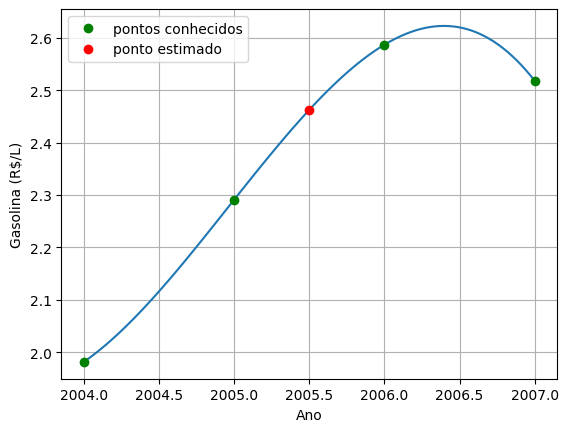

In [ ]:
#INTERPOLAÇÃO (Lagrange)
# bibliotecas e dados
from matplotlib.cm import ma
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(2002,2021)
y_0 = [1.5739,2.2152,1.9813,2.291,2.587,2.518,2.493,2.524,2.578,2.67,2.74,2.886,2.98,3.323,3.73,3.687,4.199,4.305,4.462]

# solicitar mês e ano do usuário e transcforma-lo em decimal
Mes = int(input("Mês: "))
Ano = int(input("Ano: "))
xE = Ano + Mes/12
# seleciona n pontos mais proximos do valor que se deseja estimar
def prox(num,x,y):
  n = 4
  pontoX = np.zeros(n)
  pontoY = np.zeros(n)
  nums = np.ones(len(x))*num
  xd = abs(nums-x)
  indice = np.argsort(xd)
  for i in range(n):
    pontoX[i] = x[indice[i]]
    pontoY[i] = y[indice[i]]
  return pontoX,pontoY
# cálculo da função interpoladora
def pol(p,xp,x):
  num = 1
  for i  in range(len(x)):
    if xp!=x[i] :
      num *= (p - x[i])/(xp - x[i])
  return num
def inter(p,x,y):
  num = 0
  for i in range(len(x)):
    num+= pol(p,x[i],x)*y[i]
  return num
# vetor de pontos proximos e estimativa p/ y(xE) com 4 casas decimais
Vx,Vy = prox(xE,x,y_0)
yE = inter(xE,Vx,Vy)
print("Estimativa(R$): ",round(yE,4))
# plota a função interpoladora
xn = np.linspace(min(Vx),max(Vx),100)
yn = inter(xn,Vx,Vy)
plt.plot(xn,yn)
# plota os pontos usados (verde) e o ponto estimado (vermelho)
plt.plot(Vx,Vy,'og', label = "pontos conhecidos")
plt.plot(xE,yE,'or', label = "ponto estimado")
plt.xlabel('Ano')
plt.ylabel('Gasolina (R$/L)')
plt.legend()
plt.grid()

# Simulei que o usuário inseriu 6 e 2005, correspondendo à estimativa do mês de junho de 2005

In [ ]:
"""
Comentários finais:
- MMQ (OK!): Método aplicado com sucesso, o uso de um polinômio de segundo grau foi escolhido após uma análise do comportamento dos pontos conhecidos
e por possuir menor erro quadrático em relação à um polinômio de grau 1.
- Raízes (OK!): Observando o comportamento de crescimento dos polinômios foi possível observar que em algum momento entre 2035 e 2038 as funções
iriam se encontrar e a partir disso usei o método da falsa posição (seguro e com menos iterações que o método da bissecção) para estimar o ano
futuro em que a tarifa do transporte público equivalerá ao preço doolitro da gasolina.
- Interpolação (OK!): A escolha do método de Lagrange foi simplismente por ser mais fácil de implementar e já práticado em laboratório, gerando uma boa
estimativa do mês em que se quer saber o preço do litro da gasolina no período conhecido.
"""

# **Considerações**
Desenvolvi este projeto no primeiro semestre de 2023 e percebi que algumas melhorias podem ser implementadas. Por exemplo, seria interessante incluir opções para o usuário inserir o número de viagens ou o consumo de gasolina em litros durante um dia típico. Além disso, ampliar a base de dados utilizada no cálculo e excluir alguns valores para avaliar a confiabilidade das estimativas. Fazer esse upgrade ficaria mais como um hobbie visto que meus interesses atuais divergem de saber informações monetárias sobre o transporte urbano de Fortaleza (moro em Natal ^^’). Para aqueles que se interessarem, sitam-se livres para modificar como quiser. Desde a entrega inicial do projeto, não fiz quaisquer modificações nele.

In [ ]:
'''
Sites/acesso:
https://g1.globo.com/ce/ceara/noticia/passagem-de-onibus-em-fortaleza-sobe-para-r-340.ghtml - acesso em 28/06/2023
https://g1.globo.com/ce/ceara/noticia/2019/01/26/passagem-de-onibus-em-fortaleza-fica-mais-cara.ghtml - acesso em 28/06/2023
https://diariodotransporte.com.br/2020/01/08/fortaleza-congela-valor-da-tarifa-de-onibus-para-2020/ - acesso em 28/06/2023
https://www20.opovo.com.br/app/opovo/economia/2017/01/11/noticiasjornaleconomia,3679093/com-16-36-passagem-tem-maior-reajuste-desde-2003.shtml?hl=pt_BR
- acesso em 28/06/2023
https://investnews.com.br/economia/em-20-anos-quantidade-de-gasolina-que-salario-minimo-pode-comprar-aumenta-57/ - acesso em 28/06/2023
'''